# Studying Predictive Factors for Patients' Missing their Scheduled Medical Appointments in Brazil
by Osama Mohamed Naguib






> Brief description of the dataset:
   > * Dataset has over 110'000 observations for patients schdeduled medical appointments data; including the following features:
        * 'Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension','Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'
    > * We will investigate the correlation between most of these independent variables with the depedent variable "the missed appointments" ~NO-Show incidences).
 

### Research Questions:

#### Q1: Does receiveing SMS message affect the Commitment of patients to their Scheduled medical appoitnments (No-Show)?
#### Q 2:  Do Age groups affect No-show incidences?
#### Q 3:  Do Leading Days ( time between scheduling date and appoitnment date) affect Patients' commitment to their medical appoitnments?
#### Q 4:  Do accompanies medical conditions or being on a schoolarship affect Patients' commitment to their medical appoitnments?




# 1) Preliminary Wrangling

First we are going to import necessary ibraries, read the dataset, navigate into it to address any cleaning issues, and fix it, before we can go with the exploration process.

So, let's start:

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Loading data set and exploring the main charactersitcs of it
df_raw = pd.read_csv('DS_NO_SHOW.csv')
print(df_raw.shape, "\n","\n", df_raw.columns)


(110527, 14) 
 
 Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# Decapitalize, Removing Extra spaces and renaming bad columns names:
df_raw.rename(columns= lambda x : x.lower(), inplace=True)
df_raw.rename(columns=lambda x: x.strip(), inplace=True)
df_raw.rename(columns={'hipertension': 'hypertension',
                       'handcap': 'handicapped', 'no-show': 'missed_appoint'}, inplace=True)
# Checking the results
df_raw[:1]


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,missed_appoint
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


> Now all the columns have proper names with no spaces nor dashes, and can be easily handled onward.

> ## Then we are going to explore all the dataset columns/variables, `using a for-loop`, to address their number of unique values (to determine its type; Categorical or Numerical), data type, no of duplicates or nulls, if available.

In [5]:
# Looping through columns to adress no. of unique values, datatypes, duplicates, nulls
for header in df_raw.columns:
    print("{}, .............No. of unique values: {}, ..............datatype: {}, ........Duplicates: {}, .......nulls:{}\n".format(
        header, df_raw[header].nunique(), df_raw[header].dtype, df_raw[header].duplicated().sum(), df_raw[header].isna().sum()))

patientid, .............No. of unique values: 62299, ..............datatype: float64, ........Duplicates: 48228, .......nulls:0

appointmentid, .............No. of unique values: 110527, ..............datatype: int64, ........Duplicates: 0, .......nulls:0

gender, .............No. of unique values: 2, ..............datatype: object, ........Duplicates: 110525, .......nulls:0

scheduledday, .............No. of unique values: 103549, ..............datatype: object, ........Duplicates: 6978, .......nulls:0

appointmentday, .............No. of unique values: 27, ..............datatype: object, ........Duplicates: 110500, .......nulls:0

age, .............No. of unique values: 104, ..............datatype: int64, ........Duplicates: 110423, .......nulls:0

neighbourhood, .............No. of unique values: 81, ..............datatype: object, ........Duplicates: 110446, .......nulls:0

scholarship, .............No. of unique values: 2, ..............datatype: int64, ........Duplicates: 110525,

> We noticed that most of the variables are categorical and few are numerical.



> some data types aren't correct and will be adjusted onward.

In [6]:
# Checking for nulls and duplicated values:
df_raw.isnull().sum(),df_raw.duplicated().sum()

(patientid         0
 appointmentid     0
 gender            0
 scheduledday      0
 appointmentday    0
 age               0
 neighbourhood     0
 scholarship       0
 hypertension      0
 diabetes          0
 alcoholism        0
 handicapped       0
 sms_received      0
 missed_appoint    0
 dtype: int64,
 0)

> No Duplicated nor nulls are found in the dataset.

In [7]:
df_raw.patientid.duplicated().sum()


48228

> Although there're more than 48k duplicated patients ids records; it will not be considred as duplicates, as each patient could have multiple schdeduled and appointment dates, and a resulting No-show or attended stats.

> Dates columns are not in the correct formats (object), so it will be changed into datetime formats.
<br/><br/>


In [8]:
#  Correcting datatypes for dates
df_raw['appointmentday'] = pd.to_datetime(df_raw.appointmentday)
df_raw['scheduledday'] = pd.to_datetime(df_raw.scheduledday)
# Checking results
df_raw[['appointmentday', 'scheduledday']].dtypes

appointmentday    datetime64[ns, UTC]
scheduledday      datetime64[ns, UTC]
dtype: object


> For deeper exploration  and correlation study of the dataset variables later on; some additional column will be added as follows:
*  "leading days" that calculates the leading days available for patients between scheduling date and appointment dates, to see its correlation with dependent variable latter.

* Month: representing the name of the month that the appointment was carried on

* day of week: reporesnting the name of day of the week that the appointment date were in.

In [9]:
# Addition for an extra column "leading days"
df_raw['leading_days'] = (df_raw.appointmentday - df_raw.scheduledday).dt.days

# Addition for extra columns "month" and day_of_week for further investigation
df_raw['month'] = df_raw.appointmentday.dt.month_name('English')
df_raw['day_of_week'] = df_raw.appointmentday.dt.day_name()

# Checking results
df_raw[['leading_days', 'month', 'day_of_week']].dtypes


leading_days     int64
month           object
day_of_week     object
dtype: object

> Patient and appointment IDs are in int formate which is not correct, so we shall change it into object

In [10]:
# Converting IDs columnns into object dtype
df_raw[['patientid', 'appointmentid']] = df_raw[['patientid', 'appointmentid']].astype(str)
# checking results of the conversion
df_raw[['patientid', 'appointmentid']].dtypes

patientid        object
appointmentid    object
dtype: object

> Handicapped column contains 5 unique values 0 for the not handicapped and from 1 to 4 for the handicapped status, which turned out to be the degree of the disability, after doing some internet research, so it should be converted into boolean by grouping the handicapped different degrees into one category

In [11]:
# Converting Values other than 0 in the handicaped column into 1; indicating the handicapped feature
df_raw.loc[df_raw.handicapped != 0, 'handicapped'] = 1
# Checking the results of this step
df_raw.handicapped.value_counts()


0    108286
1      2241
Name: handicapped, dtype: int64

> Moreover, most of the columns contains only 2 unique values; dichotmous in nature, but with (int) datatype, or "Yes" and "No" entries; such as "missed_appoint", so we will convert all of them into boolean datatype.
<br><br>
> Starting with missed_appoint by convering Yes and No into True and False, followed by other 1 and 0 columns by using astype method to convert them all into bool all at once.

In [12]:
# Converting missed appointment dtype into boolean by converting yes into 1 and no into 0 then do the conversion
df_raw.loc[df_raw.missed_appoint == "Yes", 'missed_appoint'] = 1
df_raw.loc[df_raw.missed_appoint == "No", 'missed_appoint'] = 0
# Creating a list with all the dichotonous columns that shall be conveted into boolean dtype.
boolean_Col = ['hypertension', 'diabetes', 'alcoholism', 'scholarship',  'handicapped', 'sms_received', 'missed_appoint']
# converting them all at once
df_raw[boolean_Col] = df_raw[boolean_Col].astype(bool)
#  checking the result of the conversion
df_raw.dtypes


patientid                      object
appointmentid                  object
gender                         object
scheduledday      datetime64[ns, UTC]
appointmentday    datetime64[ns, UTC]
age                             int64
neighbourhood                  object
scholarship                      bool
hypertension                     bool
diabetes                         bool
alcoholism                       bool
handicapped                      bool
sms_received                     bool
missed_appoint                   bool
leading_days                    int64
month                          object
day_of_week                    object
dtype: object

In [13]:
df_raw.describe()

,age,leading_days
count,110527.000000,110527.000000
mean,37.088874,9.183702
std,23.110205,15.254996
min,-1.000000,-7.000000
25%,18.000000,-1.000000
50%,37.000000,3.000000
75%,55.000000,14.000000
max,115.000000,178.000000


> We Noticed that there's a quality issue in the age represented by negative number (-1), which should be truncated.

In [14]:
# Finding -1 Age patients and dropping them:
df_raw.drop(df_raw[df_raw.age< 0].index, inplace=True)
# Checking that the row has been dropped
df_raw[df_raw.age< 0].index

Int64Index([], dtype='int64')

> As age is a continous Numerical variable and shall be usefull in many charts, but we also need to explore it as a categorical variable to get more insights about different age groups response to their scheduled medical appointment, so we shall convert it into categorial variable in a new column called age_gps with the following details:
* Chidren: from 0 to 17
* Young Adults: from 18 to 29
* Adults: from 30 to 49
* Older Adults: from 50 to 64
* Geriaterics: from 65 and above

In [15]:
# Segmenting ages into Age groups; for better visualization and higher understanding of the impact of age variable on dependent variable (No-Show):
age_bins = ['Children', 'Young adults', 'Adults', 'Older Adults', 'Geriatrics']
df_raw['age_gps'] = pd.cut( df_raw['age'], bins=[0, 17, 29, 49, 64, 115], labels=age_bins , include_lowest=True).astype(str)
# Checking results with value counts:
df_raw.groupby('missed_appoint')['age_gps'].value_counts()


missed_appoint  age_gps     
False           Adults          23200
                Children        21382
                Older Adults    18849
                Young adults    12607
                Geriatrics      12169
True            Adults           6180
                Children         5997
                Young adults     4124
                Older Adults     3785
                Geriatrics       2233
Name: age_gps, dtype: int64

> Similarly, we are going to segment the leading days (continous numerical variable), into main 5 groups, to be used as a categorical variable in comparison with dependent variable; for better understanding for the effect of the leading time on No-show incidence and how it could interfere (as mediating or moderating variable) on the sms_received varibale.

In [16]:
# Segmenting Leading days into  groups for better further exploration ot its correlation with dependent varibale
# for better visualization and higher understanding of the impact of age variable on dependent variable(No-Show):
lead_days_bins = ['Scheduled\nafter Appoint', 'Same Day\nScheduling', '1 - 4\n Lead Days'
                  , '5 - 10\nLead Days', '> 10\nLead Days']
df_raw['leading_periods'] = pd.cut(df_raw['leading_days'], bins=[-7, -1, 0 , 4 , 10, 178]
                                , labels=lead_days_bins, include_lowest=True).astype(str)
# Checking results with value counts:
df_raw.groupby('leading_periods')['missed_appoint'].value_counts(1)*100


leading_periods           missed_appoint
1 - 4\n Lead Days         False             75.877753
                          True              24.122247
5 - 10\nLead Days         False             72.656967
                          True              27.343033
> 10\nLead Days           False             67.458681
                          True              32.541319
Same Day\nScheduling      False             78.649530
                          True              21.350470
Scheduled\nafter Appoint  False             95.340576
                          True               4.659424
Name: missed_appoint, dtype: float64

> ## Now we've finished the data wrangling process and reached the clean tidy dataset, and we've even added some extra columns/features of interest, and now we are ready for the EXPLORATION phase.

# 2) Exploration Phase

### What is the structure of your dataset?


In [17]:
df_raw.shape

(110526, 19)

### What is/are the main feature(s) of interest in your dataset?


> 'Gender', 'leading_days', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'day of week', and  'month'.


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Age groups and sms_received.

## Univariate Exploration


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

Since most of our variables/featues are categorical, so it belong to the "discrete probability distribution", and we shall explore the structure of each of them; addressing the % of each of their values,and using the countplot chart to depict the differnces in proportions within each of the categroial values.

On the other hand, as we will see in the next section, we are going to exlpore the few numerical varibales (Leading Days and Age ) using histogram and bosplot charts, to spot their distribition too, and it turned out to be `right-skewed` for the "leading_days", with too many outliers, and `almost normal distribution`  for "age" with one outlier.

#### 1) Categorical (and boolean) Variables Plottings:

`To facilitate and shorten the exploration process, we gonna loop through all the variables of interest to show their values proportions and count as well `

F    65.0
M    35.0
Name: gender, dtype: float64 % 

SCHOLARSHIP Percent is  9.83 % 

HYPERTENSION Percent is  19.72 % 

DIABETES Percent is  7.19 % 

ALCOHOLISM Percent is  3.04 % 

HANDICAPPED Percent is  2.03 % 

SMS_RECEIVED Percent is  32.1 % 

MISSED_APPOINT Percent is  20.19 % 

May      73.14
June     23.93
April     2.93
Name: month, dtype: float64 % 

Wednesday    23.40
Tuesday      23.20
Monday       20.55
Friday       17.21
Thursday     15.60
Saturday      0.04
Name: day_of_week, dtype: float64 % 

Adults          26.58
Children        24.77
Older Adults    20.48
Young adults    15.14
Geriatrics      13.03
Name: age_gps, dtype: float64 % 

Scheduled\nafter Appoint    34.89
> 10\nLead Days             30.27
1 - 4\n Lead Days           16.31
5 - 10\nLead Days           13.80
Same Day\nScheduling         4.72
Name: leading_periods, dtype: float64 % 



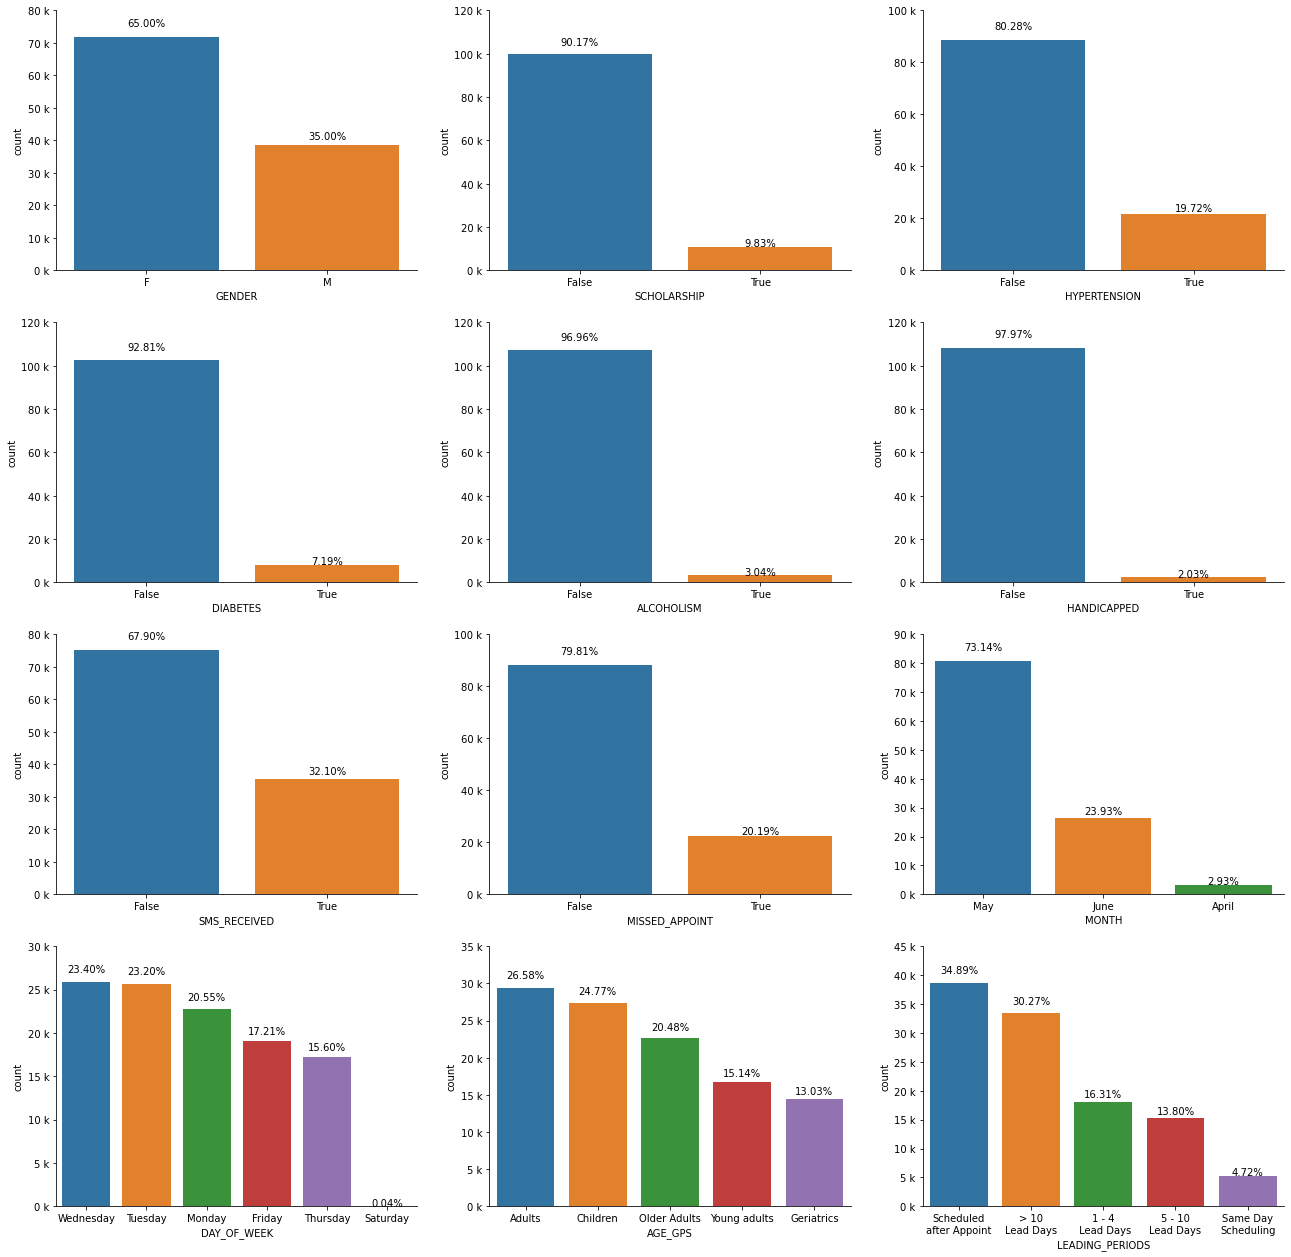

In [18]:
# opening an empty list called n and configuring the chart size;
# optionaly we could add a color palette and style too, but we keep omit them this time for a simpler charts
n = 0
plt.figure(figsize=[22,22])
# color = sb.color_palette()[1]
# sb.set(style="white")
# Looping though columns and passing conditions to spot the categorical variables only
for c in df_raw.columns:
    if  df_raw.groupby(c)['missed_appoint'].value_counts().shape[0]<20:
        # group_and_value_counts = df_raw.groupby(c)['missed_appoint'].value_counts(1).unstack()
        value_counts = df_raw[c].value_counts(1)
        # Selecting only boolean columns though condition, then to print the main value percentage of the total
        if df_raw[c].value_counts().index[1] == True:
            print(df_raw[c].value_counts().name.upper(), "Percent is ", round(value_counts[1]*100, 2), '%', "\n")
        # if it is not boolean and it is categorical with more values than the True and False Values, 
        else:
            print(round(value_counts*100,2), '%', "\n")
        # Adding one to the empty to zero for each loop
        n = 1 + n
        
        # Configuring subplots using the variable n to determine chart number
        plt.subplot(4,3,n)
        
        # Ordering values for categorical varibales
        order = df_raw[c].value_counts().index
        
        # Plotting countplot chart using seaborn
        ax = sb.countplot(x=df_raw[c], order=order)
        # Assgining a new variabe p for the total row number 
        p = df_raw[c].shape[0]
        
        # Assgining a new variabe counts for the value_counts of the categorical column
        counts = df_raw[c].value_counts()
        
        # We Can add a custom title too to each chart uing the following code, but we omit it; as  x-axis label do the job apprperiately
        # plt.title = (df_raw[c].name.upper(), " Distribution")

        # Adding x-axis label usign the capitalized name of the column
        plt.xlabel(df_raw[c].name.upper())

        # Setting yticks to show thousands as K instead of 000, to make the chart looks more neat.
        ax.set_yticks(ax.get_yticks().tolist())
        ax.set_yticklabels(['{:,} k'.format(int(x/1000)) for x in ax.get_yticks().tolist()])

        # Looping again to calculate and plot the percentage of each value_counts of each categorical variable
        for i in range(counts.shape[0]):
            # Selecting specific count for each column
            count = counts.iloc[i]
            # Calculating, formating the printing the percentage (proportion) of each value count versus the entire category
            pct = '{:0.2f}%'.format(100*count/p)
            # Specifing where to print this percentage in the chart; just above each column
            plt.text(i, count+(count*.045), pct, ha='center')
            # Removing upper and right chart margins for clearer and pilished view
            sb.despine()


> Major insights about the Study Sample:
 * % of Patient who had a SCHOLARSHIP is  9.83 %.

 * % of Patinets who had HYPERTENSION is  19.72 % 

 * % of Patinets who had DIABETES is  7.19 % 

 * % of Patinets who are ALCOHOLIC is  3.04 % 

 * % of HANDICAPPED Patients Percent is  2.03 % 

 * % of Patients who received SMS is  32.1 % 
 
 * % of Patients who missed their medical appointments is  20.19 %
 
 * % of most of the appointments carried on on May and june, and few in April with a percentage of `73%, 23%, and 3%`, respectively.

 
 * % of Adults Patients from 30 to 50 had the higher proportion of the sample with `~ 26%`, followed by Children and Older Adults with  `~ 25%` and `~ 20%`,respectively, then comes the young Adults (from 18 till 29), and Geriatrics (above 65) with `~ 15%` and `~ 13%`, respectively.
 
 * Most of Scheduling dates were assigned after the appointmet dates `(~ 35%)` with negative values/days ranging from -7 days till -1 day , while about `30%` of appointment had been scheduled prior with a leading days of 10 or more, meanwhile leading days of 1 to 10 days accounted for about `30%` of appointments, and finally about only `5%` of scheduled dates were assignend at the same day of the appointment.

#### 2) Numerical Variables Plottings:

Exploring numnerical variables using .describe() method.

In [19]:
# Exploring stats of numerical variables
df_raw.describe()

,age,leading_days
count,110526.000000,110526.000000
mean,37.089219,9.183794
std,23.110026,15.255034
min,0.000000,-7.000000
25%,18.000000,-1.000000
50%,37.000000,3.000000
75%,55.000000,14.000000
max,115.000000,178.000000


> Main Insights:
* Around 50% of the Patients had a max of 3 days as a leading days before their medical appoitnment dates.
* Most of the leading days (time from scheduling the appointment till the apointment date) were too short with median of 3 days and even 25% of appointments were scheduled after the appointment date had already passed (negative values).
* Median age was 37, while the maximum age were 115 years old in the study.

Plotting Numerical Variables; Age; and Leading days (difference between Scheduled date and Appointment date), using histograms charts.

#### 1) Leading Days

''

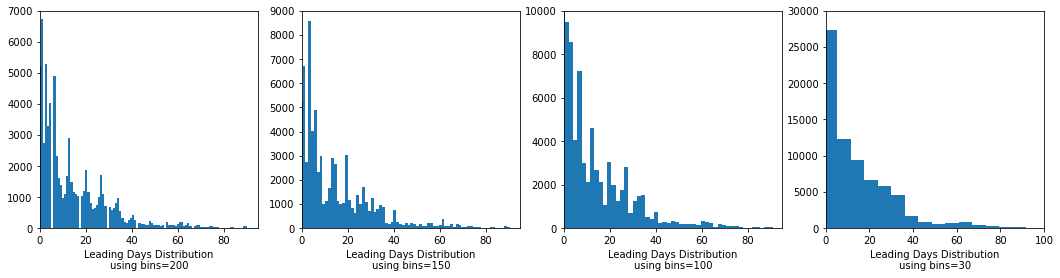

In [20]:
# Plotting leading days as histogram with different bin sizes and x and y axis limits
# to find the best representative chart specs

# Addressing Figure size
plt.figure(figsize=[18,4])

# Adding subplots
plt.subplot(141)
# Adding title of the chart

# Plotting of histogram using plt library
plt.hist(df_raw.leading_days, bins=200)
# Setting x and y axes limits to enhance the reading of the chart
plt.xlim(0, 95)
plt.ylim(0, 7000)
plt.xlabel('Leading Days Distribution\nusing bins=200')

# Repeating the chart with different bin size and x and y axes limits

plt.subplot(142)

plt.hist(df_raw.leading_days, bins=150)
plt.xlim(0, 95)
plt.ylim(0, 9000)
plt.xlabel('Leading Days Distribution\nusing bins=150')


plt.subplot(143)

plt.hist(df_raw.leading_days, bins=100)
plt.xlim(0, 95)
plt.ylim(0, 10000)
plt.xlabel('Leading Days Distribution\nusing bins=100')


plt.subplot(144)

plt.hist(df_raw.leading_days, bins=30)
plt.xlim(0, 100)
plt.ylim(0, 30000)
plt.xlabel('Leading Days Distribution\nusing bins=30')

;


''

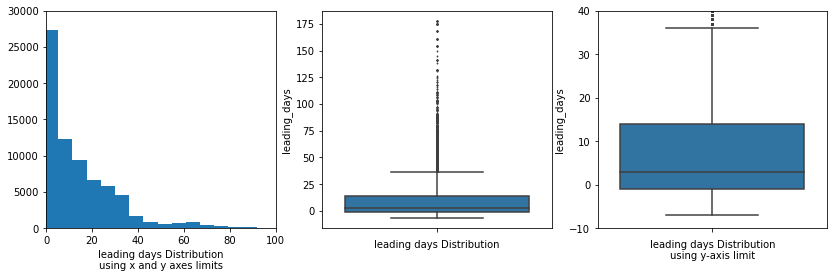

In [21]:
# Plotting leading days using seaborn's displot with the most approperiate bin size,
# and keeping the kde line on to show better the outline of the histogram's columns.
plt.figure(figsize=[14,4])
plt.subplot(1,3,1)
plt.hist(df_raw.leading_days, bins=30 )
plt.xlim(0, 100)
plt.ylim(0, 30000)
plt.xlabel('leading days Distribution\nusing x and y axes limits')

# Further exploration for the distribution&  outliers of the leading days
# using the seaborn's boxplot.
plt.subplot( 1,3,2)
sb.boxplot(y=df_raw.leading_days, fliersize=1)
plt.xlabel('leading days Distribution')

plt.subplot(1, 3, 3)
sb.boxplot(y=df_raw.leading_days, fliersize=1)
plt.ylim(-10,40)
plt.xlabel('leading days Distribution\nusing y-axis limit')
;


> We've noticed that leading days distribution is right skewed, due to multiple outlier, as we will see below


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


> Although we had multiple outliers in leading days column, and the distribution is right-skewed; we didn't require any axis transformation; we only set  x and y axes limits to make the chart more readable.
<br><br>
> Similarly, we didn't require any axis transformation for the age column, as its distribution is almost a normal distribution and had only one outlier, and in the wrangling process, we've removed one incorrect entry of -1 years old (quality issue)

### Addressing Outliers in leading days:

In [22]:
# Addressing Outlier in leading days column by calculating the  upper and lower bound/whisker
for x in ['leading_days']:
    q_75, q_25 = np.percentile(df_raw.loc[:, x], [75, 25])
    intr_qrtile = q_75-q_25

    max = q_75+(1.5*intr_qrtile)
    min = q_25-(1.5*intr_qrtile)

    outliers_min = df_raw.loc[df_raw[x] < min, x].unique().tolist()
    
    outliers_max = (df_raw.loc[df_raw[x] > max, x].unique()).tolist()
    outliers_max.sort()
print(outliers_min , outliers_max)


[] [37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 100, 101, 102, 103, 104, 106, 107, 108, 109, 110, 111, 114, 116, 118, 121, 122, 124, 125, 126, 131, 132, 138, 141, 145, 150, 154, 161, 168, 175, 178]


In [23]:
len(outliers_max)

91

> Many outliers 91 ranging from 37 to 178 (above the 1.5 interquartile range IQ) were detected on leading days column, as depicted on the previous cell; 'outliers_max', meanwhile; no outlers were found below the 1.5 * IQ range; 'outliers_min'.

> No Transofrmation is needed, we will only set an axis limit in chart for better observation of insights.

#### 2) Age

''

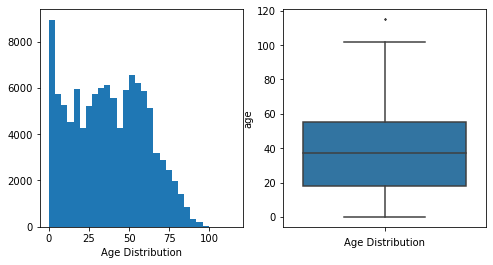

In [24]:
# Plotting leading days using seaborn's displot with the most approperiate bin size,
# and keeping the kde line on to show better the outline of the histogram's columns.
plt.figure(figsize=[8, 4])
plt.subplot(1, 2, 1)
plt.hist(df_raw.age, bins=30)
plt.xlabel('Age Distribution')

# Further exploration for the distribution&  outliers of the leading days
# using the seaborn's boxplot.
plt.subplot(1, 2, 2)
sb.boxplot(y=df_raw.age, fliersize=1)
plt.xlabel('Age Distribution')
;


> We noticed that age distribution is almost normal distribution, with only one outlier, as follows:

### Addressing Outliers in Age column:

In [25]:
# Addressing Outlier in age column by calculating the  upper and lower bound/whisker
for x in ['age']:
    q_75, q_25 = np.percentile(df_raw.loc[:, x], [75, 25])
    intr_qrtile = q_75-q_25

    max = q_75+(1.5*intr_qrtile)
    min = q_25-(1.5*intr_qrtile)

    outliers_min = df_raw.loc[df_raw[x] < min, x].unique().tolist()

    outliers_max = (df_raw.loc[df_raw[x] > max, x].unique()).tolist()
    outliers_max.sort()
print(outliers_min, outliers_max)


[] [115]


In [26]:
# Exploring Outlier data
df_raw[df_raw.age == 115]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicapped,sms_received,missed_appoint,leading_days,month,day_of_week,age_gps,leading_periods
63912,31963211613981.0,5700278,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,False,False,False,False,True,False,True,2,May,Thursday,Geriatrics,1 - 4\n Lead Days
63915,31963211613981.0,5700279,F,2016-05-16 09:17:44+00:00,2016-05-19 00:00:00+00:00,115,ANDORINHAS,False,False,False,False,True,False,True,2,May,Thursday,Geriatrics,1 - 4\n Lead Days
68127,31963211613981.0,5562812,F,2016-04-08 14:29:17+00:00,2016-05-16 00:00:00+00:00,115,ANDORINHAS,False,False,False,False,True,False,True,37,May,Monday,Geriatrics,> 10\nLead Days
76284,31963211613981.0,5744037,F,2016-05-30 09:44:51+00:00,2016-05-30 00:00:00+00:00,115,ANDORINHAS,False,False,False,False,True,False,False,-1,May,Monday,Geriatrics,Scheduled\nafter Appoint
97666,748234579244724.0,5717451,F,2016-05-19 07:57:56+00:00,2016-06-03 00:00:00+00:00,115,SÃO JOSÉ,False,True,False,False,False,True,False,14,June,Friday,Geriatrics,> 10\nLead Days


> Only one outlier age is found (115 year old) represneted by 2 female patinets with 5 scheduled/appoitnments dates, so we can only use axis limit with 102 to eliminate the outlier effect on charts, and NO transofrmation is needed too.

#### 3) Plotting the 2 numerical variables together in one boxplot chart without setting axis limits.

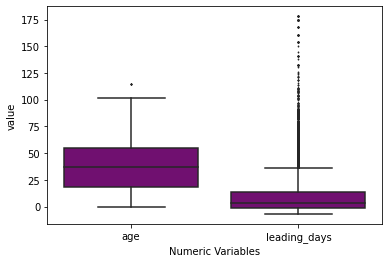

''

In [27]:


df_num = df_raw[['age', 'leading_days']]
sb.boxplot(x="variable", y="value", data=pd.melt(df_num), fliersize=1, color='purple')
plt.xlabel('Numeric Variables')
plt.show()

;

## Bivariate Exploration


> First we are going to explore the relationship between each of the variables of interest  against the dependent variable once using a 'CUSTOME FUNCTION', that shall calculate the percentages of the missed appointment patients in each subgroup of the variables of interest then plot it against the dependent vaiable "missed_Appoint" in stacked bar columns, facilitating the exploration of the correlation study. 
<br><br>
> e.g. We are going to address the percentage of the missed appointment patients in only the female patients in comparison of the male patients in the gender column and so on for all the other categorical/boolean variables, to address whether there is a significant difference among subgroups or not, as the big diffrence could lead to a correlation possibility with the dependent variable "missed_appoint".  

### **Defining the custom function**

In [28]:
# Defining custom function graph_n_pct, which shall calculate and print a grouped by valu_Counts of each variable against
# the missed_appoint/dependent variable, then plot a stacked bar chart using seaborn's histplot with multiple=stack and discrete=True aurgemnts
# then finally calculate only the percentage of the dependent variable in each subgroup and put it on place on the chart
# varibales includes respectively; dataframe; column1, column2, column1value1, column2_value2, xlabel_column2,  xlabel_column1
def graph_n_pct (df,c1,c2,c1x1,c1x2,c2x1,c2x2):
    # Printing values and percentages of each value of the column
    print(df[c1].name.upper(),"\nValues: \n", df.groupby(c1)[c2].value_counts(),"\n")
    print("Percentges: \n", round(df.groupby(c1)[c2].value_counts(1)*100, 2), ' %', "\n\n")
    # Plotting the stacked bar chart using histplot, and assigning it to ax variable
    ax = sb.histplot(data=df, x=c1, stat='count', hue=c2, multiple='stack',  discrete=True, shrink=0.8, hue_order=[True, False], palette='ocean_r')
    # Customizing the chart legend
    plt.legend([c2x1.upper(), c2x2.upper()])
    # Customizing the chart x-axis labels
    plt.xlabel(df[c1].name.upper())
    
    # Calculating percentage of variable 2 after grouping by variable 1
    pct = df.groupby(c1)[c2].value_counts(1)
    # Calculaitng value_counts of variable 1
    counts_bv = df[c1].value_counts()
    # Removing upper and right borders of the chart for more polished look
    sb.despine()
    # Setting a condition to segregate the boolean column than the categorical columns; as they require slightly different code (uses iloc) to plot proper chart 
    if df[c1].dtype == 'bool':
        # Using a for loop to loop inside each of the subgoup of each variable to calcuale its missed percentage and their location on chart
        for u in range(df[c1].value_counts().shape[0]):
            count = counts_bv.iloc[u]
            pct_bv = '{:0.2f}%'.format(100*pct.iloc[((u+1)*2)-1])
            # Adding the percentages in place using plt.text 
            plt.text(u, count*.89, pct_bv, ha='center', va='center')
            # Adding the subgroups names on the chart using plt.xticks
            plt.xticks((.025, 1), (('NO'  ,c1x1.upper()), ( c1x2.upper())))
    # For non boolean categorical variables use the next loop, then using the (loc) instead of the iloc as these varibales contains strings values
    else:
        for u in df[c1].value_counts().index:
            count = counts_bv.loc[u]
            pct_bv = '{:0.2f}%'.format(100*pct[u][1])
            plt.text(u, count*.89, pct_bv, ha='center', va='center')

    # if ax.set.yticks line removed, we shall get a warning, that could be silenced either by adding the line or change the default warning filter settings
    # And so I choose to use the yticks line.
    # import warnings
    # warnings.filterwarnings("default")
    # Setting axis number format to be "k" instead of the 000, for nicer and easier to comprehend chart using the ytick and yticklabels and format methods.
    ax.set_yticks(ax.get_yticks().tolist())
    ax.set_yticklabels(['{:,} k'.format(int(x/1000))
                        for x in ax.get_yticks().tolist()])


### **Running the custom function with all the categorical variables all at once**

GENDER 
Values: 
 gender  missed_appoint
F       False             57245
        True              14594
M       False             30962
        True               7725
Name: missed_appoint, dtype: int64 

Percentges: 
 gender  missed_appoint
F       False             79.69
        True              20.31
M       False             80.03
        True              19.97
Name: missed_appoint, dtype: float64  % 


SCHOLARSHIP 
Values: 
 scholarship  missed_appoint
False        False             79924
             True              19741
True         False              8283
             True               2578
Name: missed_appoint, dtype: int64 

Percentges: 
 scholarship  missed_appoint
False        False             80.19
             True              19.81
True         False             76.26
             True              23.74
Name: missed_appoint, dtype: float64  % 


HYPERTENSION 
Values: 
 hypertension  missed_appoint
False         False             70178
              True        

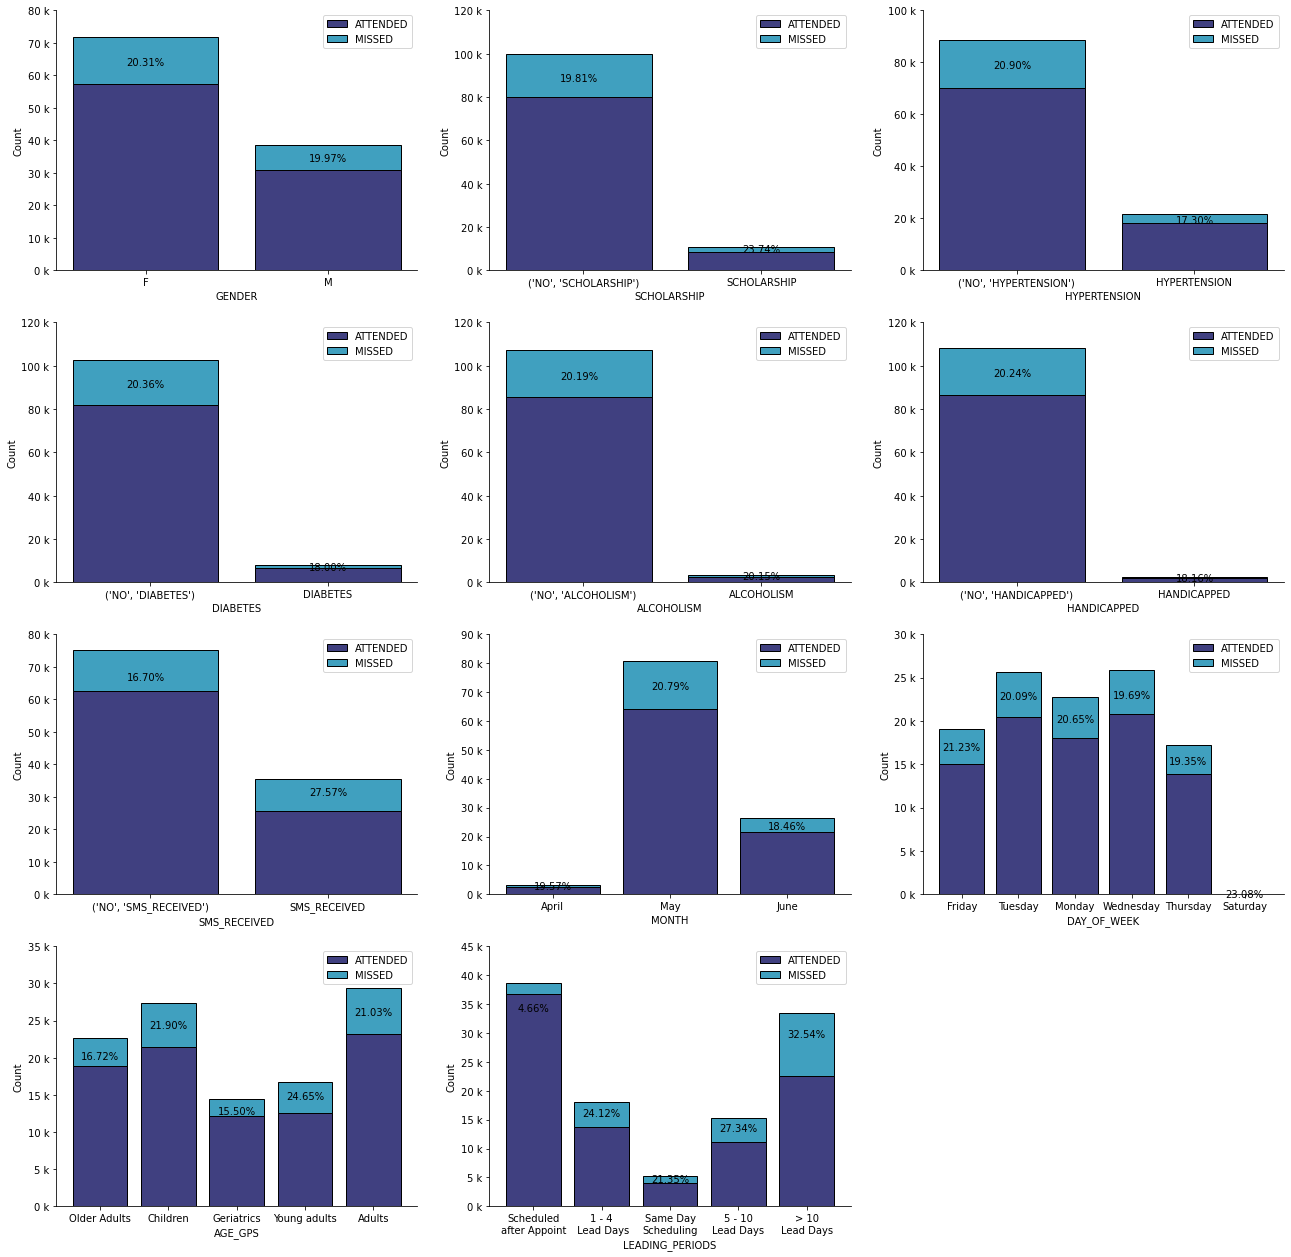

In [29]:
# Assigning n with the value of 0, and then shall be used inside the loop to adhust the index of the subplots
n = 0
# Setting the figure size
plt.figure(figsize=[22, 22])
# Using a for loop to loop over all the varibales using the custom funciton graph_n_pct
for k in df_raw.columns:
    # Condition to skip numenrical variables
    if 2 < df_raw.groupby(k)['missed_appoint'].value_counts().shape[0] < 20:
        # Adding 1 to n for every loop, then use in as an index in the subplot aurgment latter. 
        n = 1 + n
        plt.subplot(4, 3, n)
        # using the custom fucntion graph_n_pct to plot and calcualte the required percentages
        graph_n_pct(df_raw, k, 'missed_appoint' , df_raw[k].name, df_raw[k].name
                    , 'Attended', 'Missed')
        


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> As we've see in the univariate exploration, that the overall missed appointment percent% is 20%, so any subgroup of each and all of the categorical variable that has less or more significant percentages; will be further investigated for correlation with the dependent variable.

This excercise expresses the importance of studying the relationship between 2 or more variables at once; to be able to observe and interpret the right insights; 

> For example:
<br><br>
 * We can see that most of the subgroups missed appointment proportions are similar to the average of 20% except for:
 <br><br>
    ##### Remarkebly Below Average:
        * Hypertension, Diabetic, Handicapped, older Adults and Geriatric Patients.
    ##### Remarkebly Above Average:
        * sms_received, Young Adults, 1-4 and 5-10 and over 10 leading days before appointment Patients.



> After exploring the relationship between each of the __*categorical*__ variables with the dependent variable; now it is the __*numerical*__ variables turn:

### Leading Days

In [49]:
# Exploring correlation between missing the appointment and leading days
df_raw.groupby('missed_appoint')['leading_days'].describe()

,count,mean,std,min,25%,50%,75%,max
missed_appoint,,,,,,,,
False,88207.0,7.754759,14.550450,-1.0,-1.0,1.0,11.0,178.0
True,22319.0,14.831489,16.605912,-7.0,3.0,10.0,22.0,178.0


''

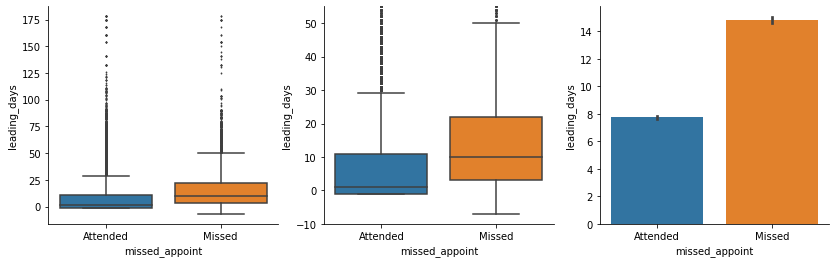

In [33]:
# Plotting leading days versus missed appointment; exploaring the correlation
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
ax1 = sb.boxplot(y=df_raw.leading_days, x=df_raw.missed_appoint, fliersize=1)
ax1.set_xticklabels(['Attended', 'Missed'])
sb.despine()
#  Zooming a little bit to notice better the differnece in median, using y axis limit
plt.subplot(1, 3, 2)
ax2 = sb.boxplot(y=df_raw.leading_days, x=df_raw.missed_appoint, fliersize=1)
plt.ylim(-10,55)
ax2.set_xticklabels(['Attended', 'Missed'])
sb.despine()
# Changing the plot into barplot to spot the difference in the average of leading days
# among attended versus missed patients groups too
plt.subplot(1, 3, 3)
ax3 = sb.barplot(y=df_raw.leading_days, x=df_raw.missed_appoint)
ax3.set_xticklabels(['Attended', 'Missed'])
sb.despine()
;


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> We can observe that the median leading days remarkably differs from the attended and the missed appointment patients (1 and 10, respectively), in addition from the stacked bar charts, we also observed a remarkable difference in proportion of missed patients in patients that had leading days above 10 days with 32.5% than those who had lesser leading days ~20%.

> # suggesting that `loger leading times above 10 days were associated with higher missed appointment incidences than average.`

### Age

In [50]:
 df_raw.groupby('missed_appoint')['age'].describe()


,count,mean,std,min,25%,50%,75%,max
missed_appoint,,,,,,,,
False,88207.0,37.790504,23.338645,0.0,18.0,38.0,56.0,115.0
True,22319.0,34.317667,21.965941,0.0,16.0,33.0,51.0,115.0


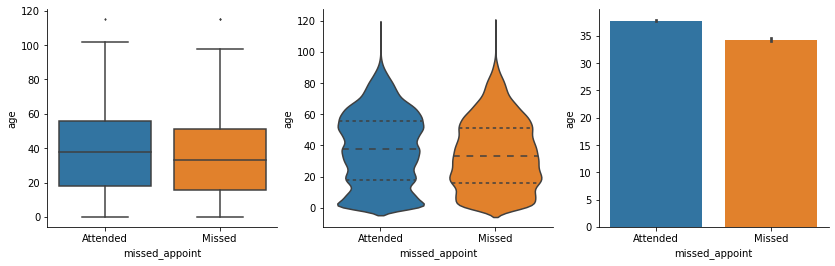

In [61]:
# Plotting age versus missed appointment; exploaring the correlation
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
ax1 = sb.boxplot(y=df_raw.age , x=df_raw.missed_appoint, fliersize=1)
ax1.set_xticklabels(['Attended', 'Missed'])
sb.despine()
#  Zooming a little bit to notice better the differnece in median, using y axis limit
plt.subplot(1, 3, 2)
ax2 = sb.violinplot(y=df_raw.age, x=df_raw.missed_appoint, fliersize=1, inner='quart')
ax2.set_xticklabels(['Attended', 'Missed'])
sb.despine()
# Changing the plot into barplot to spot the difference in the average of leading days
# among attended versus missed patients groups too
plt.subplot(1, 3, 3)
ax3 = sb.barplot(y=df_raw.age, x=df_raw.missed_appoint)
ax3.set_xticklabels(['Attended', 'Missed'])
sb.despine()


In the above boxplot we can't spot a substantial differences in ages across the missed and attended appointment patients groups, but from the previous stacked bar chart of the age_gps; we could clearly observe that in Geriatric and older Adults Age groups the percentage of missed appointment is quite lower 15% and 16% in comparison to other age groups and average missed % for the entire dataset; suggesting that 

> # `older Ages (from 50 and above) tend to stick to their scheduled medical appointments`

> One of the unexpected results that sms_received was correlated with higher percentage ~27% of missed appointments, and so we shall dig deeper in the multivariate section to address the possibility of having interction with other independent variables such as the gender, Age, or leading periods. 

## Multivariate Exploration


### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Your answer here!

### Were there any interesting or surprising interactions between features?

> Your answer here!

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [ ]:
df_raw.groupby(['',''])[''].value_counts()

In [ ]:
df_raw.groupby(['',''])[''].value_counts()

In [72]:
df_raw.groupby(['gender', 'missed_appoint'])['age'].median()


gender  missed_appoint
F       False             40.0
        True              34.0
M       False             34.0
        True              28.0
Name: age, dtype: float64

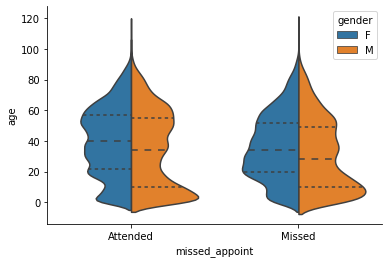

In [60]:
ax2 = sb.violinplot(y=df_raw.age, x=df_raw.missed_appoint,
                    fliersize=1, hue=df_raw.gender, inner='quart', split=True)
ax2.set_xticklabels(['Attended', 'Missed'])
sb.despine();

We can see that in both the female and males groups the median age for the attended patients is higher (40, and 34) than patients missed their appoitnments (34, and 28), repectevely; indicating that:
> # `Older patients may stick more to their scheduled medical appointments than younger patients.`

In [86]:
df_raw.groupby(['gender', 'missed_appoint'])['leading_days'].median(), df_raw.groupby(['gender', 'missed_appoint'])['leading_days'].quantile(.75)


(gender  missed_appoint
 F       False              1.0
         True              10.0
 M       False              1.0
         True               9.0
 Name: leading_days, dtype: float64,
 gender  missed_appoint
 F       False             12.0
         True              22.0
 M       False              9.0
         True              22.0
 Name: leading_days, dtype: float64)

''

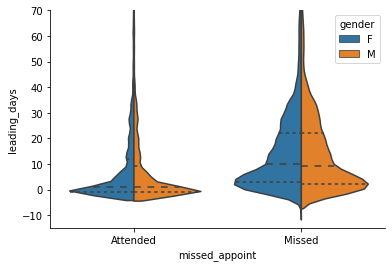

In [126]:
ax2 = sb.violinplot(y=df_raw.leading_days, x=df_raw.missed_appoint,
                    fliersize=1, hue=df_raw.gender, inner='quart', split=True)
plt.ylim(-15, 70)
ax2.set_xticklabels(['Attended', 'Missed'])
sb.despine()
;

From the previous violin chart, we can observe that the median leading days for female and male who attended patients (1 , 1) is much lower than missed patients (10, and 9), regardless of the gender.

In addition, 3rd quartile of female and male patients who attended their appointments had leading days of (12, and 9 with average of 11) and this was much lower than of who missed the appoitments (22, and 22), respectively; suggeting that:
># `longer leading days (days between scheduling date and appointments date) than 11  days may lead to higher missed appointments`.

In [205]:
df_raw.groupby(['sms_received', 'missed_appoint'])['leading_days'].median(
), df_raw.groupby(['sms_received', 'missed_appoint'])['leading_days'].quantile(.75)


(sms_received  missed_appoint
 False         False             -1.0
               True               6.0
 True          False             13.0
               True              14.0
 Name: leading_days, dtype: float64,
 sms_received  missed_appoint
 False         False              2.0
               True              19.0
 True          False             26.0
               True              27.0
 Name: leading_days, dtype: float64)

''

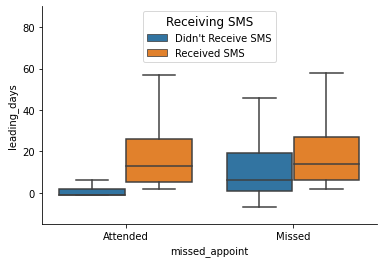

In [183]:
ax = sb.boxplot(y=df_raw.leading_days, hue=df_raw.sms_received, x=df_raw.missed_appoint, fliersize=.5,  showfliers=False)
ax.set_xticklabels(['Attended', 'Missed'])
plt.ylim(-15,80)
plt.ylim(-15,90)
handles, labels = ax.get_legend_handles_labels()
labels = ["Didn't Receive SMS", "Received SMS"]
ax.legend(handles, labels, loc=9, title="Receiving SMS", shadow=False, fancybox=True, title_fontsize='large', framealpha=0.75)
sb.despine()
;


From the previous boxplot chart, we can conclude that leading time affected receving sms, but its impact on missed appointment can't be observed from such chart, as it missing the count, but we've already studied in the stacked bar charts and report the findings in the bivariate section

<AxesSubplot:>

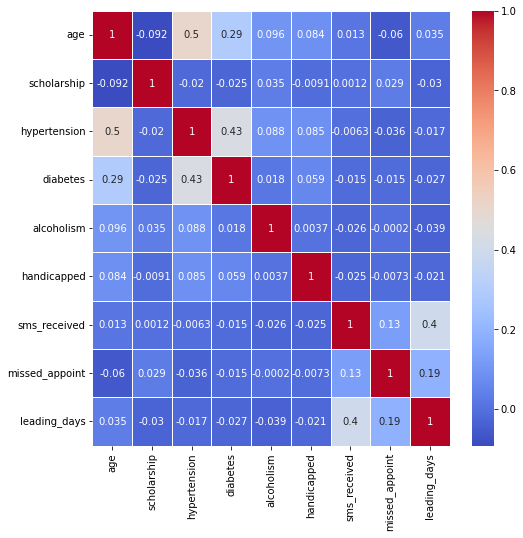

In [ ]:
plt.figure(figsize=(8,8))
sb.heatmap(df_raw.corr(), annot=True, cmap='coolwarm', linewidths=1)

Moderate/Strong Correlation is observed with age; so
> # `As age incresaes; missed appointment decreses.`

''

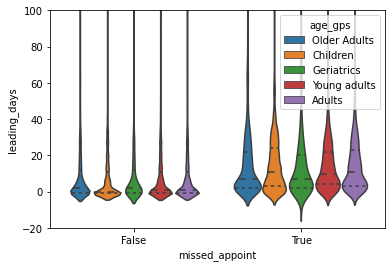

In [185]:
sb.violinplot(y=df_raw.leading_days  , hue=df_raw.age_gps, x=df_raw.missed_appoint,whis=2.5, fliersize=.5, inner='quart')
plt.ylim(-20,100)
;


> # `Higher median leading days were observed in the missed apppintments gruop across all age groups.`

''

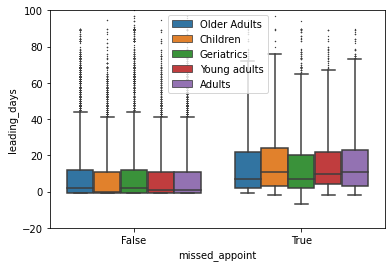

In [204]:
sb.boxplot(y=df_raw.leading_days  , hue=df_raw.age_gps, x=df_raw.missed_appoint,whis=2.5, fliersize=.5,  )
plt.legend(loc=9)
plt.ylim(-20,100)
;


C:\Users\osama.naguib\Anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 2016x288 with 0 Axes>

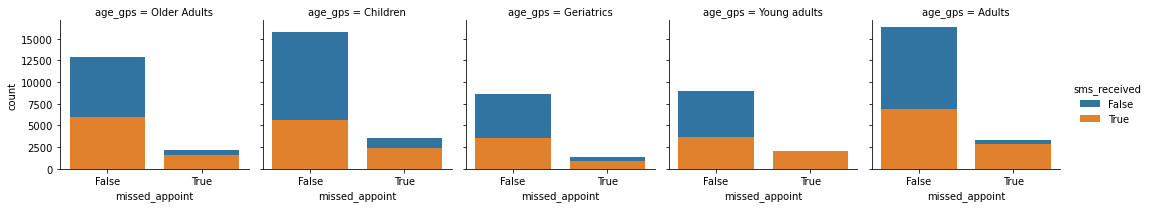

In [289]:
plt.figure(figsize=(28,4))
g = sb.FacetGrid(data=df_raw, col='age_gps', hue='sms_received')
g.map(sb.countplot, 'missed_appoint').add_legend();


As observed previously, Lower missed apointments rates were observed more from young adults and Geriatrics.

<Figure size 2304x432 with 0 Axes>

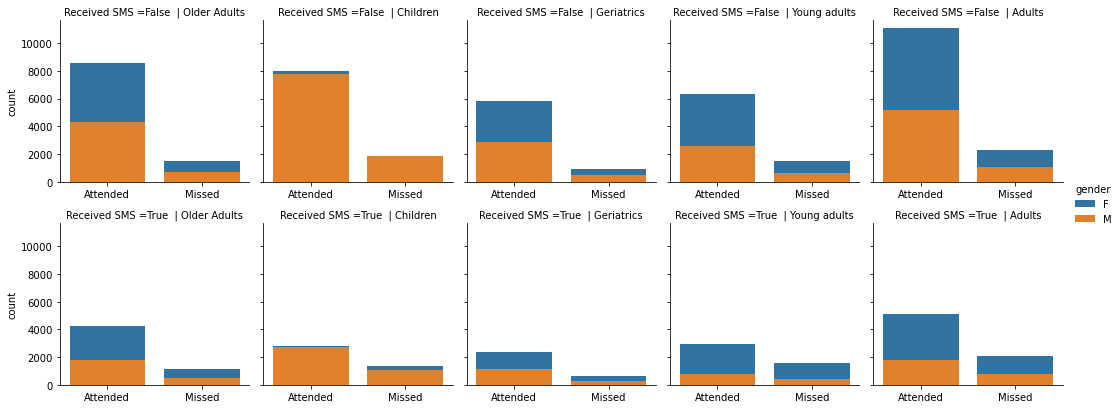

In [261]:
plt.figure(figsize=(32,6))
g = sb.FacetGrid(data=df_raw, col='age_gps', hue='gender', hue_order=["F", "M"], row='sms_received',  sharex=False )
g.map(sb.countplot, 'missed_appoint', order=[False, True]).add_legend()
g.set(xlabel=None)
g.set_xticklabels(["Attended", "Missed"])
g.set_titles(col_template='{col_name}', row_template='Received SMS ={row_name} ');


Its clearly now that receiving sms had negatively impacted all age groups attendance

<Figure size 2304x432 with 0 Axes>

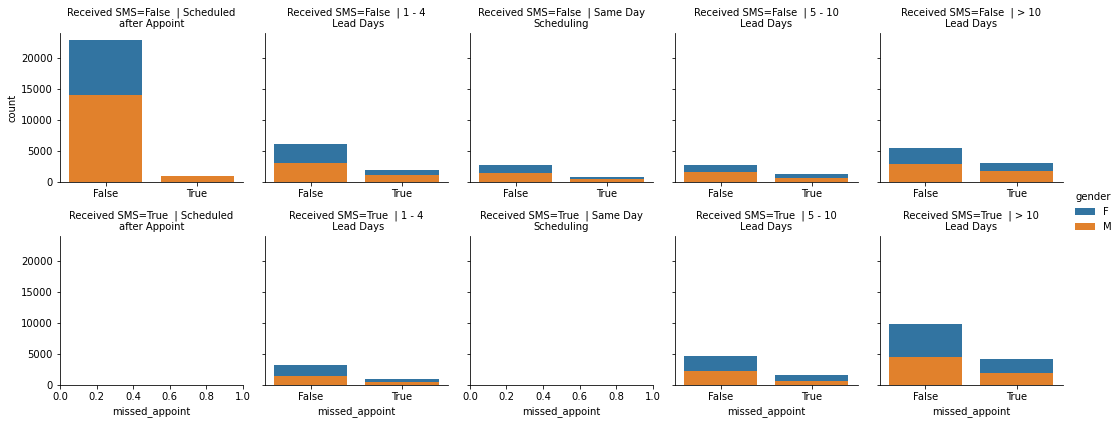

In [277]:
plt.figure(figsize=(32,6))
g = sb.FacetGrid(data=df_raw, col='leading_periods', hue='gender', hue_order=["F", "M"], row='sms_received',  sharex=False)
g.map(sb.countplot, 'missed_appoint', order=[False, True]).add_legend()

g.set_titles(col_template='{col_name}', row_template='Received SMS={row_name} ');


From the previous chart, we can conclude that
> # `Receiving sms by patients that had leading days of 5 days and above was positively correlated with higher attendance rates`,
> # `while receiving sms with patients that had 1 to 4 leading days was associated with higher missed appointments.`

# Summary:

### * longer Leading days (from scheduling date till appointment day) above 11 days were associated with lower commitment (higher missed appointments rates)
### * Age groups from 50 and above had higher commitment rates than younger ages.
### * Receiving sms messages with a leading days from 5 and above were associated with higher commitment rates (fewer missed appointments) than receiving it ### with a fewer leading days.
### * comorbidities with hypertension, diabeted or handicapped patients had fewer missed appointments rates than normal patients.


# `Take home Message (Key Insight):`
> ### Focosing on the patients who had higher missed appointments rates such as younger ages, Patients wihout comorbidities with chronic diases such as hypertension and diabetes, by ensuring shorter leading days, and sms reminders at least 5 days and earlier to the appointment day, shall improve their commitments and increase the planning accuracy and so, resources ultilization shall improve as well.`

# Limitations:
* We didsn't study neighbourhood, and the possible interaction between variables such as the comorbidity between hypertension and diabeted and so on.

* We didn't study the in-group differences among diffrent hadicapped categoreies.

# 
